In [251]:
import numpy as np
import pandas as pd
import matplotlib as plt
import math

In [252]:
df = pd.read_csv('./Pokemon.csv')

In [253]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [254]:
df = df.iloc[0:400]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
#             400 non-null int64
Name          400 non-null object
Type 1        400 non-null object
Type 2        199 non-null object
Total         400 non-null int64
HP            400 non-null int64
Attack        400 non-null int64
Defense       400 non-null int64
Sp. Atk       400 non-null int64
Sp. Def       400 non-null int64
Speed         400 non-null int64
Generation    400 non-null int64
Legendary     400 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 38.0+ KB


Total_mean = df.loc[df['Type 1'] == 'Normal','Total'].mean()
HP_mean = df.loc[df['Type 1'] == 'Normal','HP'].mean()
Attack_mean = df.loc[df['Type 1'] == 'Normal','Attack'].mean()
Defense_mean = df.loc[df['Type 1'] == 'Normal','Defense'].mean()
Sp_Atk_mean = df.loc[df['Type 1'] == 'Normal','Sp. Atk'].mean()
Sp_Def_mean = df.loc[df['Type 1'] == 'Normal','Sp. Def'].mean()
Speed_mean = df.loc[df['Type 1'] == 'Normal','Speed'].mean()

In [256]:
import matplotlib.pyplot as plt
%matplotlib inline

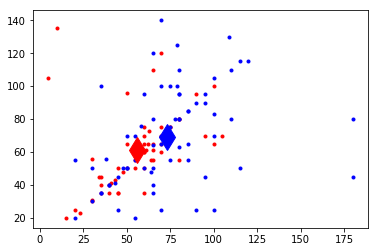

In [292]:
matrix_mean_water = [df.loc[df['Type 1'] == 'Water','Defense'].mean(),df.loc[df['Type 1'] == 'Water','Sp. Def'].mean()]
matrix_mean_normal= [df.loc[df['Type 1'] == 'Normal','Defense'].mean(),df.loc[df['Type 1'] == 'Normal','Sp. Def'].mean()]

plt.plot(df[df['Type 1'] == 'Normal']['Defense'],df[df['Type 1'] == 'Normal']['Sp. Def'],'r.',
         df[df['Type 1'] == 'Water']['Defense'],df[df['Type 1'] == 'Water']['Sp. Def'],'b.',
       )

plt.plot(matrix_mean_water[0],matrix_mean_water[1],'bd',
         matrix_mean_normal[0],matrix_mean_normal[1],'rd',markersize=19,
        )

In [258]:
matrix_mean_water = [df.loc[df['Type 1'] == 'Water','Defense'].mean(),df.loc[df['Type 1'] == 'Water','Sp. Def'].mean()]
matrix_mean_normal= [df.loc[df['Type 1'] == 'Normal','Defense'].mean(),df.loc[df['Type 1'] == 'Normal','Sp. Def'].mean()]

In [259]:
print('water mean',matrix_mean_water)
print('Normal mean',matrix_mean_normal)

water mean [73.31884057971014, 69.08695652173913]
Normal mean [56.12280701754386, 61.05263157894737]


In [260]:
combined = np.vstack((Defense_matrix, Sp_Def_matrix)).T
x_matrix = np.mat(combined[0])
np.dot(x_matrix.T,x_matrix)

matrix([[69.20310859, 42.31758034],
        [42.31758034, 25.87712665]])

In [261]:
x_matrix_total = a = np.zeros([2, 2]) 
for i in range(combined.shape[0]) : 
    
    x_matrix = np.mat(combined[i])
    x_matrix_total = x_matrix_total + np.dot(x_matrix.T,x_matrix)
x_matrix_total = x_matrix_total/combined.shape[0]
x_matrix_total

matrix([[903.81138416, 329.03024575],
        [329.03024575, 854.05040958]])

In [262]:
#df[df['Type 1'] == 'Water']['Defense'].count
number_of_Water = (df['Type 1'] == 'Water').sum()
number_of_normal = (df['Type 1'] == 'Normal').sum()
number_of_total = number_of_Water + number_of_normal
P_c1 = number_of_Water/number_of_total
P_c2 = number_of_normal/number_of_total
print(P_c1)
print(P_c2)

0.5476190476190477
0.4523809523809524


# P(x|C1) Water Trainning model

In [263]:
Defense_matrix_water = np.array(df[df['Type 1'] == 'Water']['Defense']-matrix_mean_water[0])
Sp_Def_matrix_water = np.array(df[df['Type 1'] == 'Water']['Sp. Def']-matrix_mean_water[1])
combined_water = np.vstack((Defense_matrix_water, Sp_Def_matrix_water)).T
#x_matrix_water = np.mat(combined_water[0])
#np.dot(x_matrix_water.T,x_matrix_water)
x_matrix_total_water = np.zeros([2, 2]) 
for i in range(number_of_Water): 
    
    x_matrix_water = np.mat(combined_water[i])
    x_matrix_total_water = x_matrix_total_water + np.dot(x_matrix_water.T,x_matrix_water)
x_matrix_total_water = x_matrix_total_water/number_of_Water
x_matrix_total_water
inverse_water = np.linalg.inv(x_matrix_total_water)


# P(x|C2) Normal Trainning model

In [264]:
Defense_matrix_normal = np.array(df[df['Type 1'] == 'Normal']['Defense']-matrix_mean_normal[0])
Sp_Def_matrix_normal = np.array(df[df['Type 1'] == 'Normal']['Sp. Def']-matrix_mean_normal[1])
combined_normal = np.vstack((Defense_matrix_normal, Sp_Def_matrix_normal)).T
#x_matrix_normal = np.mat(combined_normal[0])
#np.dot(x_matrix.T,x_matrix)
x_matrix_total_normal = np.zeros([2, 2]) 
for i in range(number_of_normal): 
    
    x_matrix_normal = np.mat(combined_normal[i])
    x_matrix_total_normal = x_matrix_total_normal + np.dot(x_matrix_normal.T,x_matrix_normal)
x_matrix_total_normal = x_matrix_total_normal/number_of_normal
x_matrix_total_normal
inverse_normal = np.linalg.inv(x_matrix_total_normal)


# Classification

In [308]:
def Classification(x) : 
    x = np.mat(x)
    matrix_water = np.dot(np.dot((x-matrix_mean_water),inverse_water),(x-matrix_mean_water).T)
    P_x_C1 = math.exp(-0.5*matrix_water)/((np.linalg.det(x_matrix_total_water)**0.5)*(math.pi))
    matrix_normal = np.dot(np.dot((x-matrix_mean_normal),inverse_normal),(x-matrix_mean_normal).T)
    P_x_C2 = math.exp(-0.5*matrix_normal)/(((np.linalg.det(x_matrix_total_normal))**0.5)*(math.pi))
    
    probability_c1_x = P_x_C1*P_c1/((P_x_C2*P_c2)+(P_x_C1*P_c1))
    probability_c2_x = P_x_C2*P_c2/((P_x_C2*P_c2)+(P_x_C1*P_c1))
    '''
    print('matrix_water : ', matrix_water)
    print('matrix_normal : ', matrix_normal)
    
    print('P_x_C1 : ', P_x_C1)
    print('P_x_C2 : ', P_x_C2)
    
    
    '''
    a = 0
    if probability_c1_x > probability_c2_x :
        a=a+1
        print('water class')
    else:
        print('fales')
    
    #print(probability_c1_x)
    #print(probability_c2_x)

In [309]:
#x_test = [73.31884057971014,69.08695652173913]
Defense_matrix_water = np.array(df[df['Type 1'] == 'Water']['Defense']-matrix_mean_water[0])
Sp_Def_matrix_water = np.array(df[df['Type 1'] == 'Water']['Sp. Def']-matrix_mean_water[1])
combined_water = np.vstack((Defense_matrix_water, Sp_Def_matrix_water)).T


for i in range(number_of_normal): 
    Classification(combined_water[i])

print(a/number_of_Water)

water class
fales
fales
fales
water class
fales
water class
water class
fales
water class
water class
water class
fales
water class
water class
fales
water class
water class
water class
water class
water class
water class
water class
water class
water class
fales
water class
fales
fales
fales
water class
water class
water class
fales
water class
water class
water class
fales
fales
water class
water class
fales
water class
fales
water class
water class
water class
fales
fales
water class
water class
fales
fales
water class
water class
water class
water class
[[0. 0.]
 [0. 0.]]
